## **Titanic Survival Prediction with Neural Networks**
This notebook builds a simple deep learning model using Keras to predict passenger survival in the Titanic dataset.
We will:
- Preprocess the data
- Train a neural network
- Evaluate its performance

# 🧹 Data Preprocessing
We prepare the dataset by:
- Dropping irrelevant columns
- Mapping categorical variables to numerical values
- Removing rows with missing values

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])

df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C": 1, "Q": 2})

df = df.dropna()

df["Embarked"] = df["Embarked"].astype(int)

X = df.drop(columns=["Survived"])
y = df["Survived"]

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


#🧠 Build the Neural Network

We will build a simple feedforward neural network using Keras. The architecture includes:

- One hidden layer with 16 neurons and ReLU activation
- A second hidden layer with 8 neurons
- An output layer with 1 neuron and sigmoid activation for binary classification

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#⚙️ Compile and Train the Model

We will now compile the model using:
- The Adam optimizer (efficient for most problems)
- Binary crossentropy as the loss function (for 0/1 classification)
- Accuracy as the evaluation metric

Then, we will train the model using 80% of the data for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2891 - loss: 5.4297 - val_accuracy: 0.3846 - val_loss: 4.8657
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2811 - loss: 3.6566 - val_accuracy: 0.3916 - val_loss: 2.1871
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3369 - loss: 1.4189 - val_accuracy: 0.5734 - val_loss: 0.7637
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6291 - loss: 0.7560 - val_accuracy: 0.6713 - val_loss: 0.7697
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7004 - loss: 0.7022 - val_accuracy: 0.6434 - val_loss: 0.6993
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6741 - loss: 0.6657 - val_accuracy: 0.6364 - val_loss: 0.6674
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6831 - loss: 0.6185 - val_accuracy: 0.6643 - val_loss: 0.7251
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6726 - loss: 0.6622 - val_accuracy: 0.6853 - val_loss

#📈 Visualize Training Performance

We plot the model's training and validation accuracy and loss across all epochs to observe how well it learns over time.

This helps us detect:
- Underfitting (low training and validation accuracy)
- Overfitting (training accuracy increases while validation accuracy decreases)


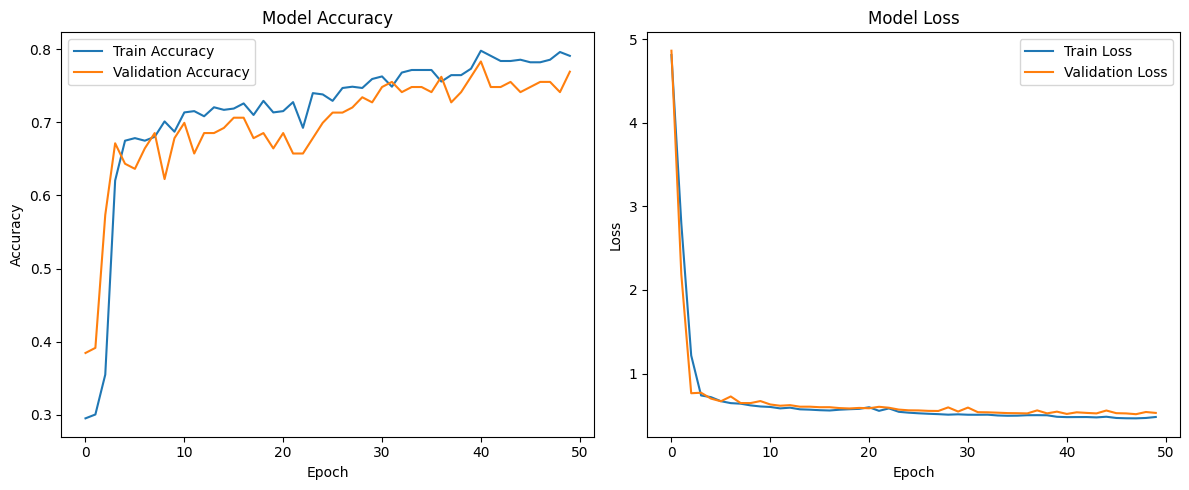

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 👤 Predict Survival for a Single Passenger

We can use our trained model to predict whether a specific passenger would have survived.  
We’ll pass a single example with the same features as the training data.

This step shows:
- How to create a new data frame with one row (the features)
- How to preprocess it if needed (e.g. scaling)
- How to get a survival probability and a binary prediction

In [ ]:
from IPython.display import display

data = pd.DataFrame([
    {'Name': 'Enoa',     'Pclass': 1, 'Sex': 1, 'Age': 20, 'SibSp': 0, 'Parch': 0, 'Fare': 80,  'Embarked': 0},
    {'Name': 'Javier',   'Pclass': 1, 'Sex': 0, 'Age': 25, 'SibSp': 1, 'Parch': 0, 'Fare': 80,  'Embarked': 1},
    {'Name': 'Maria',    'Pclass': 2, 'Sex': 1, 'Age': 22, 'SibSp': 0, 'Parch': 0, 'Fare': 40,  'Embarked': 2},
    {'Name': 'James',    'Pclass': 3, 'Sex': 0, 'Age': 40, 'SibSp': 0, 'Parch': 1, 'Fare': 12,  'Embarked': 0},
    {'Name': 'Laura',    'Pclass': 1, 'Sex': 1, 'Age': 35, 'SibSp': 1, 'Parch': 1, 'Fare': 100, 'Embarked': 1},
    {'Name': 'Kevin',    'Pclass': 2, 'Sex': 0, 'Age': 28, 'SibSp': 0, 'Parch': 0, 'Fare': 30,  'Embarked': 2},
    {'Name': 'Sara',     'Pclass': 1, 'Sex': 1, 'Age': 19, 'SibSp': 0, 'Parch': 0, 'Fare': 90,  'Embarked': 0},
    {'Name': 'Mike',     'Pclass': 3, 'Sex': 0, 'Age': 36, 'SibSp': 0, 'Parch': 0, 'Fare': 9,   'Embarked': 1},
    {'Name': 'Elena',    'Pclass': 2, 'Sex': 1, 'Age': 45, 'SibSp': 1, 'Parch': 2, 'Fare': 50,  'Embarked': 1},
    {'Name': 'Paul',     'Pclass': 1, 'Sex': 0, 'Age': 50, 'SibSp': 0, 'Parch': 0, 'Fare': 200, 'Embarked': 2},
    {'Name': 'Nina',     'Pclass': 3, 'Sex': 1, 'Age': 17, 'SibSp': 1, 'Parch': 1, 'Fare': 25,  'Embarked': 0},
    {'Name': 'Tom',      'Pclass': 2, 'Sex': 0, 'Age': 27, 'SibSp': 1, 'Parch': 0, 'Fare': 18,  'Embarked': 1},
    {'Name': 'Julia',    'Pclass': 1, 'Sex': 1, 'Age': 32, 'SibSp': 0, 'Parch': 0, 'Fare': 85,  'Embarked': 0},
    {'Name': 'Victor',   'Pclass': 3, 'Sex': 0, 'Age': 20, 'SibSp': 0, 'Parch': 0, 'Fare': 8,   'Embarked': 2},
    {'Name': 'Alice',    'Pclass': 1, 'Sex': 1, 'Age': 38, 'SibSp': 1, 'Parch': 1, 'Fare': 120, 'Embarked': 0}
])

X_new = data.drop('Name', axis=1)

probs = model.predict(X_new).flatten()
predictions = (probs > 0.5).astype(int)

data['Survival Probability'] = probs
data['Prediction'] = ['Survived' if p == 1 else 'Did not survive' for p in predictions]

display(data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Prediction', 'Survival Probability']])

total_survivors = sum(predictions)
print(f"\nThe model predicts that {total_survivors} out of 15 people would have survived.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


,Name,Pclass,Sex,Age,Fare,Prediction,Survival Probability
0,Enoa,1,1,20,80,Survived,0.884400
1,Javier,1,0,25,80,Survived,0.612737
2,Maria,2,1,22,40,Survived,0.899529
3,James,3,0,40,12,Did not survive,0.120151
4,Laura,1,1,35,100,Survived,0.922405
5,Kevin,2,0,28,30,Survived,0.536639
6,Sara,1,1,19,90,Survived,0.851489
7,Mike,3,0,36,9,Did not survive,0.123279
8,Elena,2,1,45,50,Survived,0.813599
9,Paul,1,0,50,200,Survived,0.878316



The model predicts that 11 out of 15 people would have survived.
